### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

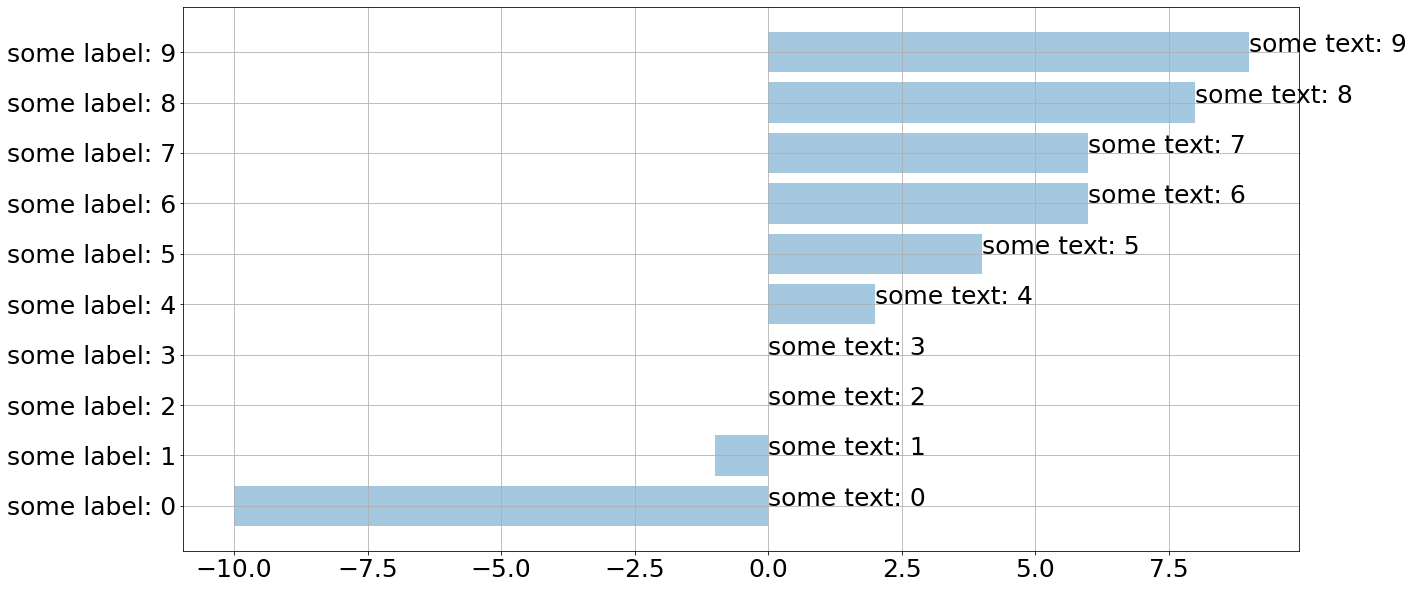

In [38]:
import numpy as np
import pandas as pd
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.grid(True)
    ax.barh(yticks_labels, bars_length, align='center', alpha=0.4)
    for x, y, label in zip(bars_length, yticks_labels, labels):
        plt.annotate(label, xy=(x if x > 0 else 0, y), size=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    plt.show()

# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

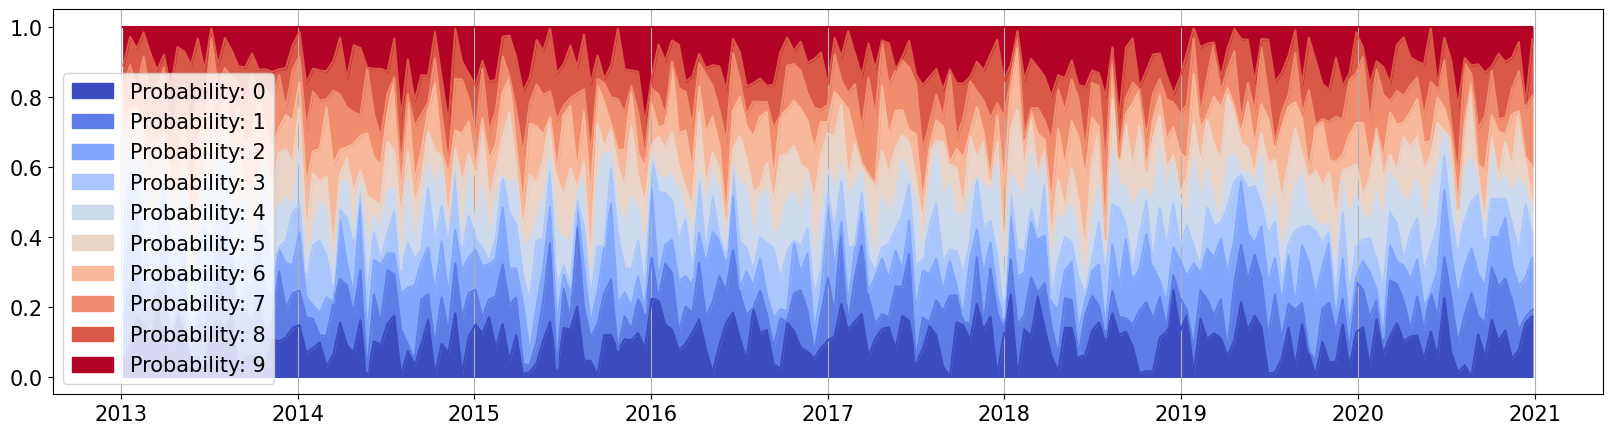

In [163]:
from matplotlib import cm
from numpy import linspace
# Сигнатура функции и пример вывода:

def plot_time_probabilities(probabilities_in_time, figsize):
    probabilities_in_time.head()
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    plt.grid(axis="x")
    start = 0.0
    stop = 1.0
    number_of_lines= 10
    cm_subsection = linspace(start, stop, number_of_lines)
    colors = [ cm.coolwarm(x) for x in cm_subsection ]
    for column in probabilities_in_time:
        color = colors[column]
        label = f'Probability: {column}'
        if column > 0:
            y_new = y + probabilities_in_time[column]
            ax.fill_between(y_new.index, y, y_new, color=color, label=label)
        else:
            y_new = probabilities_in_time[column]
            ax.fill_between(y_new.index, y_new, color=color, label=label)
        ax.plot(y_new, color=color)
        y = y_new
    plt.legend(loc='lower left', fontsize=15)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    plt.show()

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)